<a href="https://colab.research.google.com/github/zookeeper464/op.gg/blob/main/lol_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 데이터 분석에 필요한 모듈을 호출합니다.

import json
import pandas as pd

In [2]:
url = '/content/drive/MyDrive/op.gg/champions.json'
with open(url) as myfile:
    champ = json.loads(myfile.read())

In [3]:
champ[0]

{'description': 'Once honored defenders of Shurima against the Void, Aatrox and his brethren would eventually become an even greater threat to Runeterra, and were defeated only by cunning mortal sorcery. But after centuries of imprisonment, Aatrox was the first to find...',
 'icon': 'http://ddragon.leagueoflegends.com/cdn/10.23.1/img/champion/Aatrox.png',
 'id': 'aatrox',
 'key': '266',
 'name': 'Aatrox',
 'sprite': {'url': 'http://ddragon.leagueoflegends.com/cdn/10.23.1/img/sprite/champion0.png',
  'x': 0,
  'y': 0},
 'stats': {'armor': 38,
  'armorperlevel': 3.25,
  'attackdamage': 60,
  'attackdamageperlevel': 5,
  'attackrange': 175,
  'attackspeed': 0.651,
  'attackspeedperlevel': 2.5,
  'crit': 0,
  'critperlevel': 0,
  'hp': 580,
  'hpperlevel': 90,
  'hpregen': 3,
  'hpregenperlevel': 1,
  'movespeed': 345,
  'mp': 0,
  'mpperlevel': 0,
  'mpregen': 0,
  'mpregenperlevel': 0,
  'spellblock': 32.1,
  'spellblockperlevel': 1.25},
 'tags': ['Fighter', 'Tank'],
 'title': 'the Darki

In [4]:
champ_type = set()
for chmp in champ:
  champ_type = champ_type|(set(chmp['tags']))

In [5]:
# 챔프에 대한 테그를 찾고 이 태그에 따라서 분석을 하려 한다.
# 순서대로 탱커, 원딜, 브루져, 암살자, 서폿, 메이지로 부른다.

champ_type = list(champ_type)
champ_type

['Fighter', 'Marksman', 'Tank', 'Assassin', 'Mage', 'Support']

In [6]:
df0 = []
for i in champ:
  temp = set(i['tags'])
  df0.append([i['key'],i['id'],len(temp&set(['Tank'])),len(temp&set(['Marksman'])),len(temp&set(['Fighter'])),len(temp&set(['Assassin'])),
              len(temp&set(['Support'])), len(temp&set(['Mage']))])

In [7]:
Champion = pd.DataFrame(df0, columns=['championid', 'championname', 'Tank', 'Marksman', 'Fighter', 'Assassin', 'Support', 'Mage'])

In [8]:
Champion['championid'] = Champion['championid'].astype('int64')

In [9]:
Champion

,championid,championname,Tank,Marksman,Fighter,Assassin,Support,Mage
0,266,aatrox,1,0,1,0,0,0
1,103,ahri,0,0,0,1,0,1
2,84,akali,0,0,0,1,0,0
3,12,alistar,1,0,0,0,1,0
4,32,amumu,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...
147,238,zed,0,0,0,1,0,0
148,115,ziggs,0,0,0,0,0,1
149,26,zilean,0,0,0,0,1,1
150,142,zoe,0,0,0,0,1,1


In [10]:
#컴퓨터 용량의 한계로 데이터를 전부 불러오지 못하고 부분만 불러왔습니다.

In [11]:
# 약 16.8만개의 데이터 중 6만개의 게임 데이터를 불러옵니다.
# 불러옴과 동시에 데이터 처리를 보다 효율적으로 하기 위해 json데이터 형태에서 dictionary형태로 변환합니다.

N = 60000
with open('/content/drive/MyDrive/op.gg/op_gg.json', encoding='utf-8') as myfile:
    head = [json.loads(next(myfile)) for _ in range(N)]

In [12]:
# 데이터를 분석하기 위해 첫 번째, 게임의 데이터와 그 데이터가 가지고 있는 키들을 변수설정합니다.

data = head[0]
lst = list(data.keys())

In [13]:
# 각 키와 그 키가 가지고 있는 값들을 매칭하여 나타냅니다.

for i in lst:
  print(i, ':', data[i])

seasonid : 13
queueid : 420
gameid : 4621713273
participantidentities : [{'player': {'currentplatformid': 'KR', 'matchhistoryuri': '/v1/stats/player_history/KR/2384460278402912', 'platformid': 'KR', 'profileicon': 23, 'summonerid': 'PF7wuKbEjIH7bUEivDRsJbiah9EF9EzRPO-LFLucLai7avA'}, 'participantid': 1}, {'player': {'currentplatformid': 'KR', 'matchhistoryuri': '/v1/stats/player_history/KR/206928168', 'platformid': 'KR', 'profileicon': 4568, 'summonerid': 'JRuCiFpuzcsnQ9Gadn5A_0bm66-PrFaA3WKP5juhgetrx3Y'}, 'participantid': 2}, {'player': {'currentplatformid': 'KR', 'matchhistoryuri': '/v1/stats/player_history/KR/2481287071728960', 'platformid': 'KR', 'profileicon': 7, 'summonerid': 'o5ZjlQkLgDZzDG_dkT0GVL7X34kp51abqkUN6P7K2WPeY1dy'}, 'participantid': 3}, {'player': {'currentplatformid': 'KR', 'matchhistoryuri': '/v1/stats/player_history/KR/3380059', 'platformid': 'KR', 'profileicon': 4236, 'summonerid': 'TUdiT-gEHdtkmr9JkhqvtNy5L_nutzsw2oH23kgO71NSsA'}, 'participantid': 4}, {'player': {

In [14]:
# 데이터에서 활용 가능한 키는 gameid, participantidentities, teams, participants, gameduration, gamecreation, participantextendedstats이다.

In [15]:
# 나타낸 데이터 중 list 형태이거나 dictionary 형태인 데이터는 따로 출력하여 분석한다.

In [16]:
# participantidentities 키의 값을 호출하여 데이터가 어떤 내용을 담고 있는지 분석한다.

for i in data['participantidentities']:
  print(i)

{'player': {'currentplatformid': 'KR', 'matchhistoryuri': '/v1/stats/player_history/KR/2384460278402912', 'platformid': 'KR', 'profileicon': 23, 'summonerid': 'PF7wuKbEjIH7bUEivDRsJbiah9EF9EzRPO-LFLucLai7avA'}, 'participantid': 1}
{'player': {'currentplatformid': 'KR', 'matchhistoryuri': '/v1/stats/player_history/KR/206928168', 'platformid': 'KR', 'profileicon': 4568, 'summonerid': 'JRuCiFpuzcsnQ9Gadn5A_0bm66-PrFaA3WKP5juhgetrx3Y'}, 'participantid': 2}
{'player': {'currentplatformid': 'KR', 'matchhistoryuri': '/v1/stats/player_history/KR/2481287071728960', 'platformid': 'KR', 'profileicon': 7, 'summonerid': 'o5ZjlQkLgDZzDG_dkT0GVL7X34kp51abqkUN6P7K2WPeY1dy'}, 'participantid': 3}
{'player': {'currentplatformid': 'KR', 'matchhistoryuri': '/v1/stats/player_history/KR/3380059', 'platformid': 'KR', 'profileicon': 4236, 'summonerid': 'TUdiT-gEHdtkmr9JkhqvtNy5L_nutzsw2oH23kgO71NSsA'}, 'participantid': 4}
{'player': {'currentplatformid': 'KR', 'matchhistoryuri': '/v1/stats/player_history/KR/24

In [17]:
# participantidentities의 값을 보다 더 잘 살피기 위해 첫 참가자의 내용만 가져온다.
# 이중에서 유의미한 변수는 소환사 아이디와 참가 아이디이다.

for i in list(data['participantidentities'][0]['player'].keys()):
  print(i, ':', data['participantidentities'][0]['player'][i])

currentplatformid : KR
matchhistoryuri : /v1/stats/player_history/KR/2384460278402912
platformid : KR
profileicon : 23
summonerid : PF7wuKbEjIH7bUEivDRsJbiah9EF9EzRPO-LFLucLai7avA


In [18]:
# teams 키의 값을 호출하여 데이터가 어떤 내용을 담고 있는지 분석한다.

for i in data['teams']:
  print(i)

{'firstdragon': False, 'firstinhibitor': False, 'bans': [{'pickturn': 1, 'championid': 104}, {'pickturn': 2, 'championid': 51}, {'pickturn': 3, 'championid': 58}, {'pickturn': 4, 'championid': 80}, {'pickturn': 5, 'championid': 777}], 'baronkills': 0, 'firstriftherald': True, 'firstbaron': False, 'riftheraldkills': 2, 'firstblood': True, 'teamid': 100, 'firsttower': True, 'vilemawkills': 0, 'inhibitorkills': 0, 'towerkills': 2, 'dominionvictoryscore': 0, 'win': 'Fail', 'dragonkills': 1}
{'firstdragon': True, 'firstinhibitor': False, 'bans': [{'pickturn': 6, 'championid': 120}, {'pickturn': 7, 'championid': 104}, {'pickturn': 8, 'championid': 236}, {'pickturn': 9, 'championid': 89}, {'pickturn': 10, 'championid': 245}], 'baronkills': 1, 'firstriftherald': False, 'firstbaron': True, 'riftheraldkills': 0, 'firstblood': False, 'teamid': 200, 'firsttower': False, 'vilemawkills': 0, 'inhibitorkills': 0, 'towerkills': 5, 'dominionvictoryscore': 0, 'win': 'Win', 'dragonkills': 2}


In [19]:
# teams 값을 보다 더 잘 살피기 위해 첫 참가자의 내용만 가져온다.
# 이중에서 유의미한 변수는 밴과 팀아이디, 승리여부, 파괴한 억제기의 수이다.

for i in list(data['teams'][0].keys()):
  if type(data['teams'][0][i]) == list:
    print(i, ':')
    for j in data['teams'][0][i]:
      print('\t',j)
  else:
    print(i, ':', data['teams'][0][i])

firstdragon : False
firstinhibitor : False
bans :
	 {'pickturn': 1, 'championid': 104}
	 {'pickturn': 2, 'championid': 51}
	 {'pickturn': 3, 'championid': 58}
	 {'pickturn': 4, 'championid': 80}
	 {'pickturn': 5, 'championid': 777}
baronkills : 0
firstriftherald : True
firstbaron : False
riftheraldkills : 2
firstblood : True
teamid : 100
firsttower : True
vilemawkills : 0
inhibitorkills : 0
towerkills : 2
dominionvictoryscore : 0
win : Fail
dragonkills : 1


In [20]:
# participants 키의 값을 호출하여 데이터가 어떤 내용을 담고 있는지 분석한다.

for i in data['participants']:
  print(i)

{'stats': {'physicaldamagedealt': 14561, 'neutralminionskilledteamjungle': 11, 'magicdamagedealt': 54201, 'totalplayerscore': 0, 'deaths': 3, 'win': False, 'neutralminionskilledenemyjungle': 0, 'largestcriticalstrike': 0, 'totaldamagedealt': 70392, 'magicdamagedealttochampions': 14450, 'visionwardsboughtingame': 0, 'damagedealttoobjectives': 8413, 'largestkillingspree': 2, 'item1': 3003, 'quadrakills': 0, 'totaltimecrowdcontroldealt': 108, 'wardskilled': 7, 'firsttowerassist': False, 'firsttowerkill': False, 'item2': 2421, 'item3': 3020, 'item0': 1054, 'firstbloodassist': False, 'visionscore': 20, 'wardsplaced': 4, 'item4': 3027, 'item5': 0, 'item6': 3364, 'turretkills': 0, 'triplekills': 0, 'damageselfmitigated': 13394, 'champlevel': 13, 'goldearned': 9063, 'magicaldamagetaken': 8731, 'kills': 4, 'doublekills': 0, 'truedamagetaken': 1439, 'assists': 9, 'unrealkills': 0, 'neutralminionskilled': 15, 'objectiveplayerscore': 0, 'combatplayerscore': 0, 'damagedealttoturrets': 1657, 'physic

In [21]:
# participants 값을 보다 더 잘 살피기 위해 첫 참가자의 내용만 가져온다.
# 이중에서 유의미한 변수는 가한 피해량, 가한 cc, 받은 피해, 감소한 피해, 시야장악관련 능력 등이 있다.

def check(num):
  for i in list(data['participants'][num].keys()):
    if type(data['participants'][num][i]) == dict:
      print(i, ':')
      for j in list(data['participants'][num][i].keys()):
        print('\t',j, ':', data['participants'][num][i][j])
    else:
      print(i, ':', data['participants'][num][i])

check(0)

stats :
	 physicaldamagedealt : 14561
	 neutralminionskilledteamjungle : 11
	 magicdamagedealt : 54201
	 totalplayerscore : 0
	 deaths : 3
	 win : False
	 neutralminionskilledenemyjungle : 0
	 largestcriticalstrike : 0
	 totaldamagedealt : 70392
	 magicdamagedealttochampions : 14450
	 visionwardsboughtingame : 0
	 damagedealttoobjectives : 8413
	 largestkillingspree : 2
	 item1 : 3003
	 quadrakills : 0
	 totaltimecrowdcontroldealt : 108
	 wardskilled : 7
	 firsttowerassist : False
	 firsttowerkill : False
	 item2 : 2421
	 item3 : 3020
	 item0 : 1054
	 firstbloodassist : False
	 visionscore : 20
	 wardsplaced : 4
	 item4 : 3027
	 item5 : 0
	 item6 : 3364
	 turretkills : 0
	 triplekills : 0
	 damageselfmitigated : 13394
	 champlevel : 13
	 goldearned : 9063
	 magicaldamagetaken : 8731
	 kills : 4
	 doublekills : 0
	 truedamagetaken : 1439
	 assists : 9
	 unrealkills : 0
	 neutralminionskilled : 15
	 objectiveplayerscore : 0
	 combatplayerscore : 0
	 damagedealttoturrets : 1657
	 physical

In [22]:
# 데이터가 너무 많아 비교를 위해 다른 참가자의 데이터도 가져왔다.

check(9)

stats :
	 physicaldamagedealt : 99898
	 neutralminionskilledteamjungle : 8
	 magicdamagedealt : 3636
	 totalplayerscore : 0
	 deaths : 3
	 win : True
	 neutralminionskilledenemyjungle : 0
	 largestcriticalstrike : 1013
	 totaldamagedealt : 105084
	 magicdamagedealttochampions : 928
	 visionwardsboughtingame : 1
	 damagedealttoobjectives : 12006
	 largestkillingspree : 6
	 item1 : 3508
	 quadrakills : 0
	 totaltimecrowdcontroldealt : 154
	 wardskilled : 3
	 firsttowerassist : False
	 firsttowerkill : False
	 item2 : 3031
	 item3 : 3006
	 item0 : 1055
	 firstbloodassist : False
	 visionscore : 15
	 wardsplaced : 10
	 item4 : 1038
	 item5 : 1053
	 item6 : 3363
	 turretkills : 2
	 triplekills : 0
	 damageselfmitigated : 3706
	 champlevel : 13
	 goldearned : 11884
	 magicaldamagetaken : 3900
	 kills : 10
	 doublekills : 3
	 truedamagetaken : 362
	 assists : 2
	 unrealkills : 0
	 neutralminionskilled : 8
	 objectiveplayerscore : 0
	 combatplayerscore : 0
	 damagedealttoturrets : 3841
	 physi

In [23]:
# participantextendedstats 키의 값을 호출하여 데이터가 어떤 내용을 담고 있는지 분석한다.

for i in data['participantextendedstats']:
  print(i)

{'participantid': 1, 'position': 'MID', 'tier': 'DIAMOND', 'tierrank': 'II', 'leaguepoints': 33}
{'participantid': 2, 'position': 'SUPPORT', 'tier': 'DIAMOND', 'tierrank': 'III', 'leaguepoints': 75}
{'participantid': 3, 'position': 'TOP', 'tier': 'DIAMOND', 'tierrank': 'III', 'leaguepoints': 100}
{'participantid': 4, 'position': 'JUNGLE', 'tier': 'DIAMOND', 'tierrank': 'III', 'leaguepoints': 83}
{'participantid': 5, 'position': 'ADC', 'tier': 'DIAMOND', 'tierrank': 'II', 'leaguepoints': 63}
{'participantid': 6, 'position': 'TOP', 'tier': 'DIAMOND', 'tierrank': 'II', 'leaguepoints': 32}
{'participantid': 7, 'position': 'JUNGLE', 'tier': 'DIAMOND', 'tierrank': 'II', 'leaguepoints': 90}
{'participantid': 8, 'position': 'MID', 'tier': 'DIAMOND', 'tierrank': 'II', 'leaguepoints': 44}
{'participantid': 9, 'position': 'SUPPORT', 'tier': 'DIAMOND', 'tierrank': 'II', 'leaguepoints': 57}
{'participantid': 10, 'position': 'ADC', 'tier': 'DIAMOND', 'tierrank': 'III', 'leaguepoints': 100}


In [24]:
# 데이터를 dataframe으로 바꾸어 분석을 용이하게 하기 위해 변환과정을 거친다.

In [25]:
df1 = []
for i in range(60000):
  df1.append([head[i]['gameid'],head[i]['gameduration'],head[i]['gamecreation']])

In [26]:
Game = pd.DataFrame(df1, columns=['gameid', 'gameduration', 'gamecreation'])
# gameid, gameduration, gamecreation을 col으로 가지는 game 데이터 프레임을 만든다.

In [27]:
# 게임 데이터 프레임을 생성하여 게임 별 상황에 대한 데이터를 따로 넣고 필요한 경우에만 가져올 수 있도록 바꾸었다.

Game

,gameid,gameduration,gamecreation
0,4621713273,1514,1599158094
1,4621713359,2004,1599158200
2,4621713434,1610,1599158271
3,4621713607,1119,1599158478
4,4621713720,2003,1599158571
...,...,...,...
59995,4637087434,1177,1599747459
59996,4637087838,836,1599747582
59997,4637088062,1265,1599747688
59998,4637088065,1820,1599747610


In [28]:
temp = set()
for i in range(60000):
  data = head[i]['participants']
  for j in range(10):
    try:
      data[j]['stats']['perksubstyle']
    except:
      print(data[j]['stats'])

{'physicaldamagedealt': 39885, 'neutralminionskilledteamjungle': 0, 'magicdamagedealt': 2220, 'totalplayerscore': 0, 'deaths': 6, 'win': True, 'neutralminionskilledenemyjungle': 0, 'largestcriticalstrike': 0, 'totaldamagedealt': 49514, 'magicdamagedealttochampions': 1515, 'visionwardsboughtingame': 6, 'damagedealttoobjectives': 6131, 'largestkillingspree': 2, 'item1': 2055, 'quadrakills': 0, 'totaltimecrowdcontroldealt': 84, 'wardskilled': 20, 'firsttowerassist': True, 'firsttowerkill': False, 'item2': 3857, 'item3': 3117, 'item0': 3071, 'firstbloodassist': False, 'visionscore': 76, 'wardsplaced': 27, 'item4': 3123, 'item5': 3179, 'item6': 3364, 'turretkills': 1, 'triplekills': 0, 'damageselfmitigated': 9345, 'champlevel': 13, 'firstinhibitorkill': False, 'goldearned': 10344, 'magicaldamagetaken': 9844, 'kills': 5, 'doublekills': 1, 'truedamagetaken': 306, 'firstinhibitorassist': False, 'assists': 17, 'unrealkills': 0, 'neutralminionskilled': 3, 'objectiveplayerscore': 0, 'combatplayer

In [29]:
df2 = []
for i in range(60000):
  data = head[i]
  gameid = data['gameid']
  part = data['participantidentities']
  part2 = data['participantextendedstats']
  team = data['teams']
  position = data['participantextendedstats']
  champ = data['participants']
  for j in range(10):
    try:
      df2.append([gameid, part[j]['participantid'], part[j]['player']['summonerid'], team[j//5]['teamid'],
                  team[j//5]['bans'][j%5]['championid'], champ[j]['championid'], champ[j]['timeline']['role'], position[j]['position'],
                  champ[j]['stats']['perk0'],champ[j]['stats']['perk1'],champ[j]['stats']['perk2'],champ[j]['stats']['perk3'],
                  champ[j]['stats']['perk4'], champ[j]['stats']['perk5'],champ[j]['stats']['perkprimarystyle'],champ[j]['stats']['perksubstyle'],
                  champ[j]['stats']['statperk0'], champ[j]['stats']['statperk1'],champ[j]['stats']['statperk2']])
    except:
      df2.append([gameid, part[j]['participantid'], part[j]['player']['summonerid'], team[j//5]['teamid'],
                  team[j//5]['bans'][j%5]['championid'], champ[j]['championid'], champ[j]['timeline']['role'], position[j]['position'],
                  champ[j]['stats']['perk0'],champ[j]['stats']['perk1'],champ[j]['stats']['perk2'],champ[j]['stats']['perk3'],
                  champ[j]['stats']['perk4'], champ[j]['stats']['perk5'],champ[j]['stats']['perkprimarystyle'], 0,
                  champ[j]['stats']['statperk0'], champ[j]['stats']['statperk1'],champ[j]['stats']['statperk2']])

In [30]:
User = pd.DataFrame(df2, columns=['gameid', 'participantid', 'summonerid', 'teamid','banid', 'pickid', 'role', 'lane','perk0','perk1','perk2',
                                  'perk3','perk4','perk5','perkprimarystyle','perksubstyle','statperk0','statperk1','statperk2'])
# gameid, participantid, summonerid, teamid, banid, pickid, position를 col으로 가지는 user 데이터 프레임을 만든다.

In [33]:
# 유저 데이터 프레임을 생성하여 게임과 유저별 데이터에 대해 게임 시작 전에 정해진 데이터를 따로 넣고 필요한 경우에만 가져올 수 있도록 바꾸었다.

User

,gameid,participantid,summonerid,teamid,banid,pickid,role,lane,perk0,perk1,perk2,perk3,perk4,perk5,perkprimarystyle,perksubstyle,statperk0,statperk1,statperk2
0,4621713273,1,PF7wuKbEjIH7bUEivDRsJbiah9EF9EzRPO-LFLucLai7avA,100,104,38,SOLO,MID,8021,8009,9105,8014,8139,8135,8000,8100,5008,5008,5003
1,4621713273,2,JRuCiFpuzcsnQ9Gadn5A_0bm66-PrFaA3WKP5juhgetrx3Y,100,51,497,DUO_SUPPORT,SUPPORT,8465,8463,8444,8453,8106,8136,8400,8100,5007,5003,5002
2,4621713273,3,o5ZjlQkLgDZzDG_dkT0GVL7X34kp51abqkUN6P7K2WPeY1dy,100,58,164,SOLO,TOP,8437,8401,8444,8451,8304,8345,8400,8300,5005,5008,5002
3,4621713273,4,TUdiT-gEHdtkmr9JkhqvtNy5L_nutzsw2oH23kgO71NSsA,100,80,19,NONE,JUNGLE,8005,9111,9105,8299,8234,8232,8000,8200,5005,5008,5002
4,4621713273,5,qmcY1AJTdznK_aTgW2e1qwCY1uwbam9HU09Wsa7nI9Wt5sYQ,100,777,145,DUO_CARRY,ADC,9923,8139,8138,8135,8009,9103,8100,8000,5005,5008,5002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599995,4637088178,6,u5JXbHcmJtBOiLr6QfKg-OmGkY8pHzN-52-IXGyGFqVAg2I,200,236,75,SOLO,MID,8021,8009,9105,8299,8345,8347,8000,8300,5008,5008,5003
599996,4637088178,7,ONml7UeM4RbHJ7zWqpp0wEWJulBM9bz1BA8-6RMYeaAKLoI,200,777,9,NONE,JUNGLE,8128,8126,8138,8106,8275,8234,8100,8200,5007,5008,5002
599997,4637088178,8,MJoDEab4uqrFdJ6-v86XsP4qovHiM-dtmU4zJ8x87qul0hI,200,25,163,NONE,TOP,8128,8126,8138,8135,8009,8014,8100,8000,5008,5008,5002
599998,4637088178,9,JG9lOs0ZpOUHEHd0ZUqVAjzLGDn7a41CT1AYjSTo_Mp5rrg,200,238,235,SOLO,SUPPORT,8351,8304,8345,8410,8009,9104,8300,8000,5005,5008,5002


In [34]:
df3 = []
for i in range(60000):
  data = head[i]['participants']
  gameid =head[i]['gameid']
  for j in range(10):
    stats = data[j]['stats']
    df3.append([gameid, data[j]['participantid'], (stats['kills']+stats['assists']/max(0.1,stats['deaths'])),stats['kills'], stats['assists'], stats['deaths'], stats['goldearned'],stats['goldspent'],
                stats['totalminionskilled'], stats['largestmultikill'], stats['largestkillingspree'], stats['longesttimespentliving'],
                stats['totaldamagedealt'], stats['totaldamagedealttochampions'], stats['damagedealttoturrets'], 
                stats['damageselfmitigated'], stats['totaldamagetaken'], stats['timeccingothers'], stats['totaltimecrowdcontroldealt'],
                stats['visionwardsboughtingame'], stats['wardskilled'], stats['visionscore'], stats['wardsplaced']])

In [35]:
Stats = pd.DataFrame(df3, columns=['gameid','participantid','KDA','kills', 'assists','deaths','goldearned', 'goldspent','totalminionskilled',
                                   'largestmultikill','largestkillingspree', 'longesttimespentliving', 'totaldamagedealt',
                                   'totaldamagedealttochampions','damagedealttoturrets','damageselfmitigated','totaldamagetaken',
                                   'timeccingothers','totaltimecrowdcontroldealt','visionwardsboughtingame','wardskilled','visionscore',
                                   'wardsplaced'])
# gameid,participantid,kills, assistS,deaths,goldearned,totalminionskilled,largestmultikill,largestkillingspree, longesttimespentliving, totaldamagedealt,
# totaldamagedealttochampions,damagedealttoturrets,damageselfmitigated,totaldamagetaken,timeccingothers,totaltimecrowdcontroldealt,visionwardsboughtingame,
# wardskilled,visionscore,wardsplaced 를  col으로 가지는 stats 데이터 프레임을 만든다.

In [36]:
# 스텟 데이터 프레임을 생성하여 게임과 유저별 데이터에 대해 게임 시작 후에 정해진 데이터를 따로 넣고 필요한 경우에만 가져올 수 있도록 바꾸었다.

Stats

,gameid,participantid,KDA,kills,assists,deaths,goldearned,goldspent,totalminionskilled,largestmultikill,largestkillingspree,longesttimespentliving,totaldamagedealt,totaldamagedealttochampions,damagedealttoturrets,damageselfmitigated,totaldamagetaken,timeccingothers,totaltimecrowdcontroldealt,visionwardsboughtingame,wardskilled,visionscore,wardsplaced
0,4621713273,1,7.000000,4,9,3,9063,8050,134,1,2,942,70392,15908,1657,13394,23238,13,108,0,7,20,4
1,4621713273,2,4.714286,3,12,7,7032,5975,23,1,2,617,14066,5469,0,16913,18367,22,83,3,7,58,29
2,4621713273,3,8.666667,8,4,6,10692,10508,129,2,4,819,89119,22046,2741,23139,29863,13,168,1,0,16,6
3,4621713273,4,2.777778,2,7,9,8167,7825,31,1,0,309,129234,7308,580,16768,30215,17,186,3,4,19,3
4,4621713273,5,10.666667,9,5,3,10777,9585,174,1,6,777,106915,18316,0,8360,14532,1,14,0,5,23,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599995,4637088178,6,6.000000,4,2,1,8280,7358,139,1,3,1005,76861,9414,0,11928,17190,8,51,1,1,12,6
599996,4637088178,7,2.500000,1,6,4,6850,6700,30,1,0,519,100167,5765,0,11347,21133,25,587,0,3,22,0
599997,4637088178,8,4.375000,4,3,8,7299,6150,69,1,2,483,43735,13285,0,4205,12881,14,212,4,2,16,9
599998,4637088178,9,2.666667,1,5,3,4375,4500,19,1,0,779,9800,3272,0,2190,5924,14,47,0,0,2,2


In [37]:
df4 = []
for i in range(60000):
  team = head[i]['teams']
  id = head[i]['gameid']
  for j in range(2):
    df4.append([id, team[j]['teamid'], team[j]['win'], team[j]['inhibitorkills'],team[1-j]['inhibitorkills'], team[j]['firstdragon'], 
                team[j]['firsttower'], team[j]['firstinhibitor'], team[j]['firstblood'], team[j]['firstriftherald'], team[j]['firstbaron'], 
                team[j]['towerkills'], team[j]['dragonkills'], team[j]['riftheraldkills'], team[j]['baronkills']])

In [38]:
Team = pd.DataFrame(df4, columns=['gameid', 'teamid', 'win', 'inhibitorkills','inhibitorkilled','firstdragon','firsttower','firstinhibitor',
                                  'firstblood','firstriftherald','firstbaron','towerkills','dragonkills','riftheraldkills','baronkills'])
# gameid, teamid, win, inhibitorkills을 col으로 가지는 game 데이터 프레임을 만든다.

In [39]:
# 팀 데이터 프레임을 생성하여 게임별 팀 상황에 대한 데이터를 따로 넣고 필요한 경우에만 가져올 수 있도록 바꾸었다.

Team

,gameid,teamid,win,inhibitorkills,inhibitorkilled,firstdragon,firsttower,firstinhibitor,firstblood,firstriftherald,firstbaron,towerkills,dragonkills,riftheraldkills,baronkills
0,4621713273,100,Fail,0,0,False,True,False,True,True,False,2,1,2,0
1,4621713273,200,Win,0,0,True,False,False,False,False,True,5,2,0,1
2,4621713359,100,Fail,0,1,True,False,False,True,True,False,4,1,2,0
3,4621713359,200,Win,1,0,False,True,True,False,False,True,6,4,0,1
4,4621713434,100,Fail,0,2,False,False,False,True,True,False,1,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119995,4637088062,200,Fail,0,2,False,False,False,False,True,False,1,0,1,0
119996,4637088065,100,Fail,0,2,False,False,False,False,False,False,2,2,0,0
119997,4637088065,200,Win,2,0,True,True,True,True,True,True,9,2,2,2
119998,4637088178,100,Win,2,0,True,True,True,True,True,True,10,3,2,1


In [40]:
# 모델학습의 과정

# 데이터 타겟 설정과 모델 설정 이유 : 어느 티어에 어느 라인, 어느 직업을 선택하는 것이 승리에 더 도움이 되는지 추천하기 위함
# 데이터 분석에 대한 특징 : 데이터 중에서 억제기가 부셔진 데이터 합이 0인 데이터는 항복한 판이므로 제외한다.

# 데이터 분류에 대한 타겟 : 어떤 요소가 승리에 가장 도움이 되는지 판단하여 승리를 위한 추천 행동 제시
# 타겟을 구하기 위한 칼럼 : 유저팀 별 데이터와 유저 개인 데이터를 나누어 수집한 데이터에 대하여 모델을 생성한다.

# 데이터 분석 이후 결론 : 데이터 모델에서 승리 타겟에 가장 타겟 중요도가 높은 특징 5가지를 가져와 보여준다.

# y_col : Team_table의 win

# X_col_by_team : 'gameid', 'teamid', 'win', 'inhibitorkills','inhibitorkilled','firstdragon','firsttower', 'firstinhibitor', 
# 'firstblood','firstriftherald','firstbaron','towerkills','dragonkills','riftheraldkills','baronkills'

# X_col_by_user : 'gameid', 'participantid', 'summonerid', 'teamid','banid', 'pickid', 'role', 'lane',
# 'perk0','perk1','perk2', 'perk3','perk4','perk5','perkprimarystyle','perksubstyle','statperk0','statperk1','statperk2'

# 위의 데이터 중 banid와 pickid는 chapion table을 통해 tags를 가져온다.
# summonerid, lane는 크게 의미가 없으므로 제거한다.

# X_col_by_Stats : 'gameid','participantid','kills', 'assists','deaths','goldearned', 'goldspent','totalminionskilled',
# 'largestmultikill','largestkillingspree', 'longesttimespentliving', 'totaldamagedealt', 'totaldamagedealttochampions','damagedealttoturrets',
# 'damageselfmitigated','totaldamagetaken', 'timeccingothers','totaltimecrowdcontroldealt','visionwardsboughtingame','wardskilled','visionscore',
# 'wardsplaced'

# 개인 특징과 팀 특징을 따로 모델을 구성하여 처리한다.

In [41]:
import numpy as np

In [42]:
win_team = Team[Team['win']=='Win']

In [43]:
for i in win_team.columns:
  print(i)

gameid
teamid
win
inhibitorkills
inhibitorkilled
firstdragon
firsttower
firstinhibitor
firstblood
firstriftherald
firstbaron
towerkills
dragonkills
riftheraldkills
baronkills


In [44]:
check_list = ['teamid','firstdragon', 'firsttower', 'firstinhibitor', 'firstblood','firstriftherald', 'firstbaron']

In [45]:
for i in check_list:
  print(win_team[i].value_counts(normalize=True), '\n')

100    0.517167
200    0.482833
Name: teamid, dtype: float64 

True     0.63055
False    0.36945
Name: firstdragon, dtype: float64 

True     0.744467
False    0.255533
Name: firsttower, dtype: float64 

True     0.7182
False    0.2818
Name: firstinhibitor, dtype: float64 

True     0.609633
False    0.390367
Name: firstblood, dtype: float64 

True     0.6343
False    0.3657
Name: firstriftherald, dtype: float64 

False    0.526833
True     0.473167
Name: firstbaron, dtype: float64 



In [46]:
for i in check_list:
  print(Team[Team['win']=='Fail'][i].value_counts(normalize=True), '\n')

200    0.517167
100    0.482833
Name: teamid, dtype: float64 

False    0.656067
True     0.343933
Name: firstdragon, dtype: float64 

False    0.75685
True     0.24315
Name: firsttower, dtype: float64 

False    0.9563
True     0.0437
Name: firstinhibitor, dtype: float64 

False    0.611983
True     0.388017
Name: firstblood, dtype: float64 

False    0.670483
True     0.329517
Name: firstriftherald, dtype: float64 

False    0.9129
True     0.0871
Name: firstbaron, dtype: float64 



In [47]:
# 블루팀과 레드팀의 경우 근소한 차이로 블루팀이 유리하다.
# 억제기를 처음 파괴한 팀이 패배할 확률이 약 5%로 매우 낮다.
# 첫 바론을 처치한 팀이 패배할 확률이 약 10%로 매우 낮다.
# 첫 포탑을 파괴한 팀이 패배할 확률 이 약 25%로 낮다.
# 첫 전령을 처치한 팀이 패배할 확률이 약 32%로 낮다.
# 첫 용을 처치한 팀이 패배할 확률이 약 35%로 낮다.
# 퍼블을 획득한 팀이 패배할 확률은 약 39%로 낮다.
# 레드팀이 이길 확률은 약 49%로 낮다.

# 승리했을 때를 조사하면 항복한 경우가 포함되어 있기 때문에 정확한 판단이 어렵다.

In [48]:
number_list = ['win', 'inhibitorkills', 'inhibitorkilled', 'towerkills', 'dragonkills', 'riftheraldkills', 'baronkills']

In [49]:
for i in number_list[1:]:
  print(Team[['win',i]].value_counts(), '\n')

win   inhibitorkills
Fail  0                 56623
Win   1                 27659
      0                 14411
      2                 13039
      3                  3881
Fail  1                  2485
Win   4                   802
Fail  2                   647
      3                   174
Win   5                   163
Fail  4                    52
Win   6                    34
      7                    11
Fail  5                    10
      6                     6
      7                     3
dtype: int64 

win   inhibitorkilled
Win   0                  56623
Fail  1                  27659
      0                  14411
      2                  13039
      3                   3881
Win   1                   2485
Fail  4                    802
Win   2                    647
      3                    174
Fail  5                    163
Win   4                     52
Fail  6                     34
      7                     11
Win   5                     10
      6                     

In [50]:
# 처치한 개수를 통해 데이터를 판단해야 하는 경우 각 경우를 모두 판단해야 하지만 특성 중요도를 활용하여 대략적인 판단 근거를 제시할 수 있다.

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [52]:
target = 'win'
y_train = Team[target]
X_train = Team.drop([target,'gameid','inhibitorkills','firstdragon', 'firsttower', 'firstinhibitor', 'firstblood','firstriftherald', 'firstbaron'],axis=1)

In [53]:
X_train

,teamid,inhibitorkilled,towerkills,dragonkills,riftheraldkills,baronkills
0,100,0,2,1,2,0
1,200,0,5,2,0,1
2,100,1,4,1,2,0
3,200,0,6,4,0,1
4,100,2,1,0,2,0
...,...,...,...,...,...,...
119995,200,2,1,0,1,0
119996,100,2,2,2,0,0
119997,200,0,9,2,2,2
119998,100,0,10,3,2,1


In [54]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [55]:
y_pred = model.predict(X_train)
print('정확도: ', accuracy_score(y_train, y_pred))

정확도:  0.9537083333333334


In [56]:
# 모델을 분리하지 않았기 때문에 과적합의 우려가 있는 모델이지만 특성 중요도를 판단하기 위한 자료로 사용하기 때문에
# 앞으로 추가적인 데이터가 들어오면 수정해야 하는 부분으로 이해된다.

In [57]:
import matplotlib.pyplot as plt
importances = pd.Series(model.feature_importances_, X_train.columns)

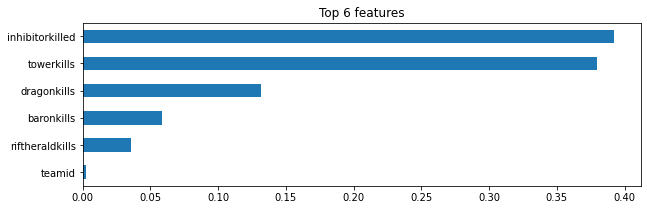

In [58]:
n = 6
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh();

In [59]:
# 억제기와 타워를 부수는 것이 가장 중요한 게임 요소인 만큼 억제기, 타워를 깬 갯수가 상당한 영향이 있다는 것을 볼 수 있다.

In [60]:
# 전체 데이터를 통해 판단한 결과를 보면 아래와 같다.

In [61]:
target1 = 'win'
y_train1 = Team[target]
X_train1 = Team.drop([target,'gameid'],axis=1)

In [62]:
model1 = RandomForestClassifier(n_estimators=100, random_state=42)
model1.fit(X_train1,y_train1)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [63]:
y_pred1 = model1.predict(X_train1)
print('정확도: ', accuracy_score(y_train1, y_pred1))

정확도:  0.9714083333333333


In [64]:
importances1 = pd.Series(model1.feature_importances_, X_train1.columns)

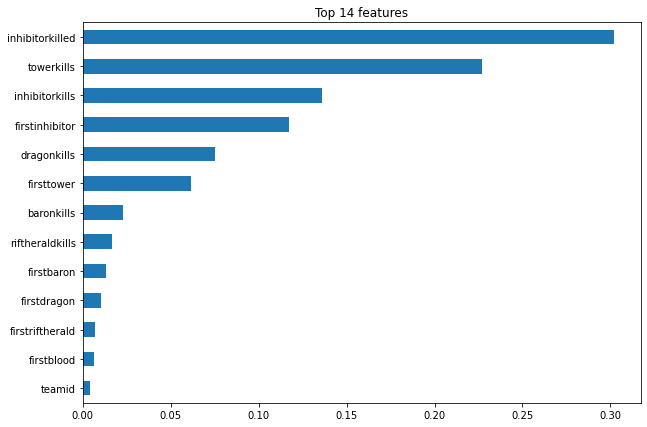

In [65]:
n = 14
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances1.sort_values()[-n:].plot.barh();

In [66]:
target2 = 'win'
y_train2 = Team[target]
X_train2 = Team.drop([target,'gameid','inhibitorkills', 'inhibitorkilled','towerkills', 'dragonkills',
       'riftheraldkills', 'baronkills'],axis=1)

In [67]:
model2 = RandomForestClassifier(n_estimators=100, random_state=42)
model2.fit(X_train2,y_train2)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [68]:
y_pred2 = model2.predict(X_train2)
print('정확도: ', accuracy_score(y_train2, y_pred2))

정확도:  0.8628583333333333


In [69]:
importances2 = pd.Series(model2.feature_importances_, X_train2.columns)

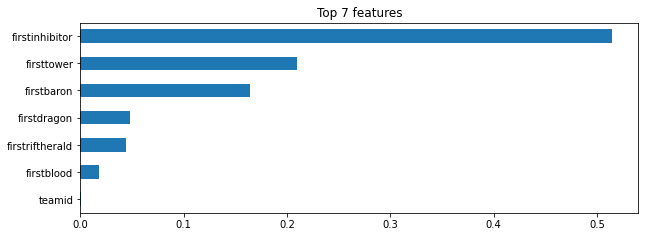

In [70]:
n = 7
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances2.sort_values()[-n:].plot.barh();

In [71]:
import seaborn as sns

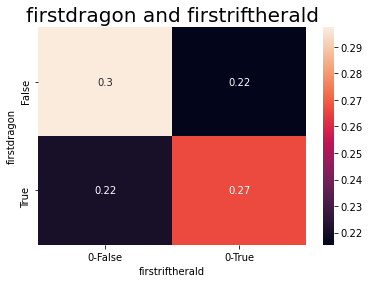

In [72]:
df = pd.DataFrame(X_train1[['firstdragon', 'firstriftherald']].value_counts(normalize=True)).reset_index()
df = pd.pivot(df,index='firstdragon',columns='firstriftherald')

ax = sns.heatmap(df, annot=True)
plt.title('firstdragon and firstriftherald', fontsize=20)
plt.xlabel('firstriftherald')

plt.show() 

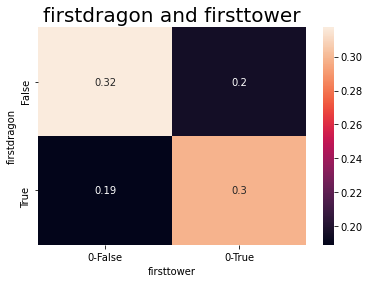

In [73]:
#'firstdragon', 'firsttower', 'firstriftherald'
df = pd.DataFrame(X_train1[['firstdragon', 'firsttower']].value_counts(normalize=True)).reset_index()
df = pd.pivot(df,index='firstdragon',columns='firsttower')

ax = sns.heatmap(df, annot=True)
plt.title('firstdragon and firsttower', fontsize=20)
plt.xlabel('firsttower')

plt.show() 

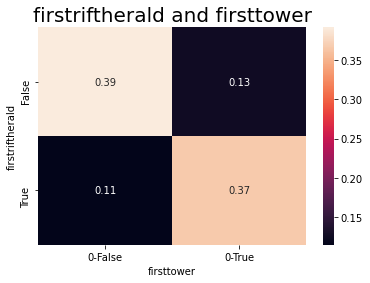

In [74]:
df = pd.DataFrame(X_train1[['firstriftherald', 'firsttower']].value_counts(normalize=True)).reset_index()
df = pd.pivot(df,index='firstriftherald',columns='firsttower')

ax = sns.heatmap(df, annot=True)
plt.title('firstriftherald and firsttower', fontsize=20)
plt.xlabel('firsttower')

plt.show() 

In [75]:
# 처음 챙길 수 있는 것은 퍼블과 전령, 용, 포탑이다. 특성중요도를 통해 알 수 있는 내용은 포블이 다른 특성에 비해
# 중요하다는 것이고 전령이 포블과 연관성이 크기 때문에 처음 표에서 본 내용과 다른 결과값이 나왔다고 볼 수 있다.
# 결론적으로 포블을 위해 전령을 챙기는 것이 초반 단계에서 승리를 위한 중요한 단계라고 볼 수 있다.

In [76]:
Stats.columns

Index(['gameid', 'participantid', 'KDA', 'kills', 'assists', 'deaths',
       'goldearned', 'goldspent', 'totalminionskilled', 'largestmultikill',
       'largestkillingspree', 'longesttimespentliving', 'totaldamagedealt',
       'totaldamagedealttochampions', 'damagedealttoturrets',
       'damageselfmitigated', 'totaldamagetaken', 'timeccingothers',
       'totaltimecrowdcontroldealt', 'visionwardsboughtingame', 'wardskilled',
       'visionscore', 'wardsplaced'],
      dtype='object')

In [77]:
User.columns

Index(['gameid', 'participantid', 'summonerid', 'teamid', 'banid', 'pickid',
       'role', 'lane', 'perk0', 'perk1', 'perk2', 'perk3', 'perk4', 'perk5',
       'perkprimarystyle', 'perksubstyle', 'statperk0', 'statperk1',
       'statperk2'],
      dtype='object')

In [78]:
SubTeam = Team[['gameid','teamid','win']]
Use_Champion = Champion[['championid','Tank', 'Marksman', 'Fighter', 'Assassin', 'Support', 'Mage']]

In [79]:
merge_User0 = pd.merge(User,SubTeam, how='left', left_on=['gameid','teamid'], right_on=['gameid','teamid'])
merge_User1 = pd.merge(merge_User0,Use_Champion, how='left', left_on='banid', right_on='championid')
merge_User2 = pd.merge(merge_User1,Use_Champion, how='left', left_on='pickid', right_on='championid')

In [80]:
merge_User2.columns = ['gameid', 'participantid', 'summonerid', 'teamid', 'banid', 'pickid',
        'role', 'lane', 'perk0', 'perk1', 'perk2', 'perk3', 'perk4', 'perk5',
        'perkprimarystyle', 'perksubstyle', 'statperk0', 'statperk1',
        'statperk2', 'win', 'championid_ban', 'Tank_ban', 'Marksman_ban', 'Fighter_ban',
        'Assassin_ban', 'Support_ban', 'Mage_ban', 'championid_y', 'Tank_pick',
        'Marksman_pick', 'Fighter_pick', 'Assassin_pick', 'Support_pick', 'Mage_pick']

In [81]:
merge_User3 = merge_User2.drop(['championid_ban', 'championid_y'], axis=1)

In [82]:
merge_User4 = pd.merge(merge_User3,Stats, how='left', left_on=['gameid','participantid'], right_on=['gameid','participantid'])

In [83]:
merge_User4.shape, merge_User4.columns

((600000, 53),
 Index(['gameid', 'participantid', 'summonerid', 'teamid', 'banid', 'pickid',
        'role', 'lane', 'perk0', 'perk1', 'perk2', 'perk3', 'perk4', 'perk5',
        'perkprimarystyle', 'perksubstyle', 'statperk0', 'statperk1',
        'statperk2', 'win', 'Tank_ban', 'Marksman_ban', 'Fighter_ban',
        'Assassin_ban', 'Support_ban', 'Mage_ban', 'Tank_pick', 'Marksman_pick',
        'Fighter_pick', 'Assassin_pick', 'Support_pick', 'Mage_pick', 'KDA',
        'kills', 'assists', 'deaths', 'goldearned', 'goldspent',
        'totalminionskilled', 'largestmultikill', 'largestkillingspree',
        'longesttimespentliving', 'totaldamagedealt',
        'totaldamagedealttochampions', 'damagedealttoturrets',
        'damageselfmitigated', 'totaldamagetaken', 'timeccingothers',
        'totaltimecrowdcontroldealt', 'visionwardsboughtingame', 'wardskilled',
        'visionscore', 'wardsplaced'],
       dtype='object'))

In [84]:
Groupby_User0 = merge_User4.drop(['gameid', 'participantid', 'teamid','banid', 'pickid','perk0', 'perk1', 'perk2', 'perk3', 'perk4', 'perk5',
        'perkprimarystyle', 'perksubstyle', 'statperk0', 'statperk1','statperk2'], axis=1)
Groupby_User1 = pd.get_dummies(Groupby_User0, columns=['lane', 'role'])
Groupby_User1 = pd.get_dummies(Groupby_User1,columns=['win'], drop_first=True)
Groupby_User2 = Groupby_User1.groupby(Groupby_User1['summonerid']).mean()

In [86]:
Groupby_User2.columns = ['Tank_ban', 'Marksman_ban', 'Fighter_ban', 'Assassin_ban',
       'Support_ban', 'Mage_ban', 'Tank_pick', 'Marksman_pick', 'Fighter_pick',
       'Assassin_pick', 'Support_pick', 'Mage_pick', 'KDA','kills', 'assists',
       'deaths', 'goldearned', 'goldspent', 'totalminionskilled',
       'largestmultikill', 'largestkillingspree', 'longesttimespentliving',
       'totaldamagedealt', 'totaldamagedealttochampions',
       'damagedealttoturrets', 'damageselfmitigated', 'totaldamagetaken',
       'timeccingothers', 'totaltimecrowdcontroldealt',
       'visionwardsboughtingame', 'wardskilled', 'visionscore', 'wardsplaced',
       'lane_ADC', 'lane_JUNGLE', 'lane_MID', 'lane_SUPPORT', 'lane_TOP',
       'role_DUO', 'role_DUO_CARRY', 'role_DUO_SUPPORT', 'role_NONE',
       'role_SOLO', 'win']

In [87]:
Groupby_User3 = Groupby_User2.dropna()

In [102]:
target = 'win'
y_train3 = Groupby_User3[target]
X_train3 = Groupby_User3.drop([target,'KDA','kills', 'assists',
       'deaths', 'goldearned', 'goldspent', 'totalminionskilled',
       'largestmultikill', 'largestkillingspree', 'longesttimespentliving',
       'totaldamagedealt', 'totaldamagedealttochampions',
       'damagedealttoturrets', 'damageselfmitigated', 'totaldamagetaken',
       'timeccingothers', 'totaltimecrowdcontroldealt',
       'visionwardsboughtingame', 'wardskilled', 'visionscore', 'wardsplaced'],axis=1)

In [89]:
from sklearn.ensemble import RandomForestRegressor

In [103]:
model3 = RandomForestRegressor(n_estimators=20, random_state=42)
model3.fit(X_train3,y_train3)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=20, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [104]:
importances3 = pd.Series(model3.feature_importances_, X_train3.columns)

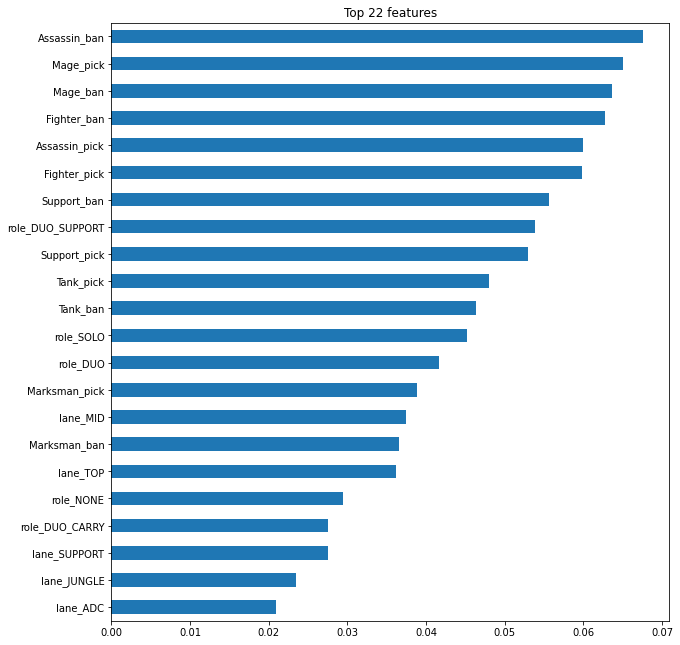

In [111]:
n = 22
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances3.sort_values()[-n:].plot.barh();

In [93]:
Groupby_User3.columns

Index(['Tank_ban', 'Marksman_ban', 'Fighter_ban', 'Assassin_ban',
       'Support_ban', 'Mage_ban', 'Tank_pick', 'Marksman_pick', 'Fighter_pick',
       'Assassin_pick', 'Support_pick', 'Mage_pick', 'KDA', 'kills', 'assists',
       'deaths', 'goldearned', 'goldspent', 'totalminionskilled',
       'largestmultikill', 'largestkillingspree', 'longesttimespentliving',
       'totaldamagedealt', 'totaldamagedealttochampions',
       'damagedealttoturrets', 'damageselfmitigated', 'totaldamagetaken',
       'timeccingothers', 'totaltimecrowdcontroldealt',
       'visionwardsboughtingame', 'wardskilled', 'visionscore', 'wardsplaced',
       'lane_ADC', 'lane_JUNGLE', 'lane_MID', 'lane_SUPPORT', 'lane_TOP',
       'role_DUO', 'role_DUO_CARRY', 'role_DUO_SUPPORT', 'role_NONE',
       'role_SOLO', 'win'],
      dtype='object')

In [94]:
target = 'win'
y_train4 = Groupby_User3[target]
X_train4 = Groupby_User3.drop([target,'Tank_ban', 'Marksman_ban', 'Fighter_ban', 'Assassin_ban', 'Support_ban', 
                               'Mage_ban', 'Tank_pick', 'Marksman_pick', 'Fighter_pick','Assassin_pick', 'Support_pick', 'Mage_pick',
                               'lane_ADC', 'lane_JUNGLE', 'lane_MID', 'lane_SUPPORT', 'lane_TOP', 'role_DUO', 
                               'role_DUO_CARRY', 'role_DUO_SUPPORT', 'role_NONE', 'role_SOLO'],axis=1)

In [95]:
model4 = RandomForestRegressor(n_estimators=20, random_state=42)
model4.fit(X_train4,y_train4)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=20, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [96]:
importances4 = pd.Series(model4.feature_importances_, X_train4.columns)

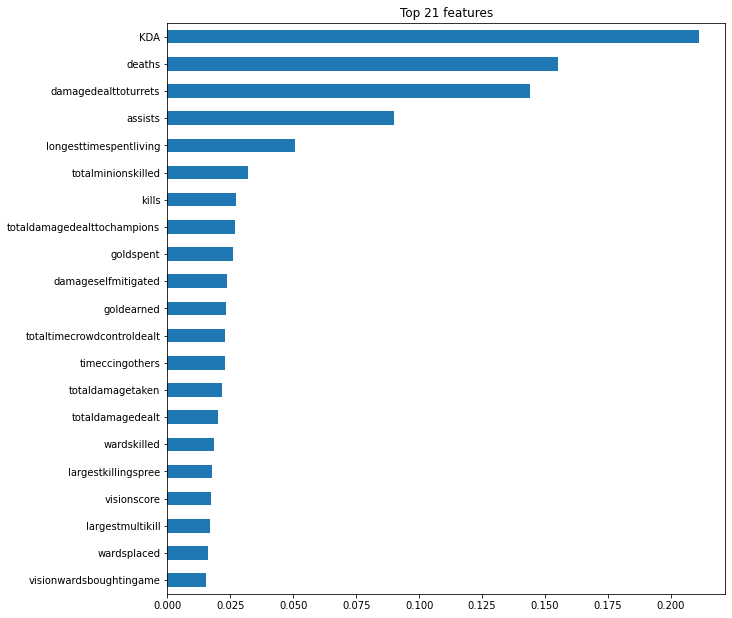

In [108]:
n = 21
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances4.sort_values()[-n:].plot.barh();

In [98]:
target = 'win'
y_train5 = Groupby_User3[target]
X_train5 = Groupby_User3.drop([target],axis=1)

In [99]:
model5 = RandomForestRegressor(n_estimators=20, random_state=42)
model5.fit(X_train5,y_train5)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=20, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [100]:
importances5 = pd.Series(model5.feature_importances_, X_train5.columns)

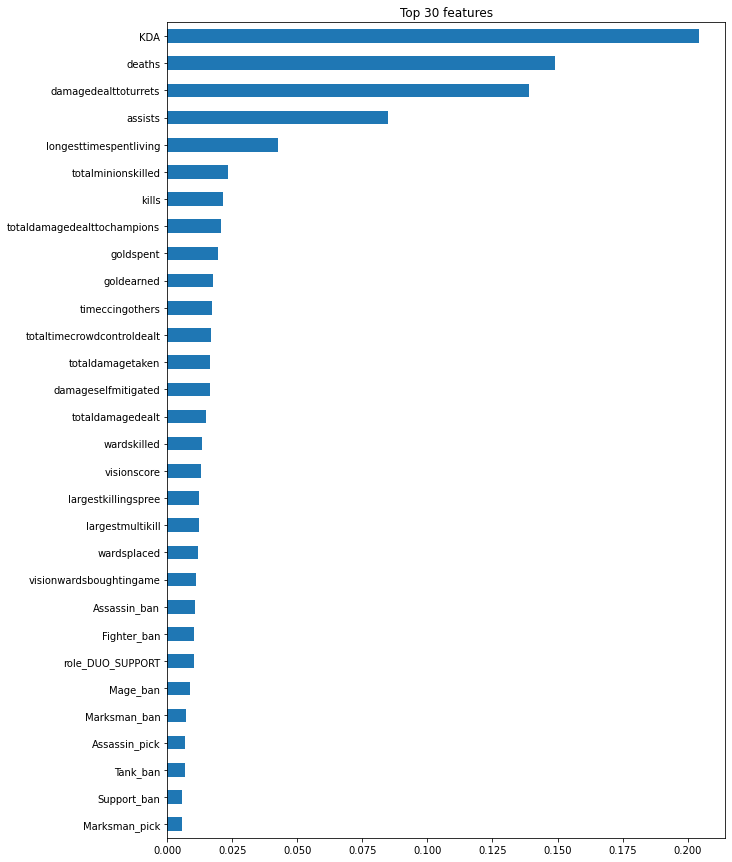

In [101]:
n = 30
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances5.sort_values()[-n:].plot.barh();

In [ ]:
# 한타 등에서 쾌감은 cc와 챔피언에게 데미지 넣는 것, 스킬을 피하는 것에 있을 수 있지만
# 실제로 게임에 승리하기 위해서는 죽지 않고 타워를 부수는 것이 가장 중요하다고 볼 수 있다.

In [ ]:
# 어떤 챔프를 밴픽하고 어느 라인에 서는지는 유저 개인의 숙련도 차이가 존재할 수 있다.
# 하지만 실제로 인게임에서 활약하는 것은 그것과 별개의 문제라고 할 수 있다.